In [1]:
import tensorflow as tf

In [2]:
df= tf.keras.datasets.mnist

In [3]:
(X_train,y_train),(X_test,y_test)=df.load_data()
X_train,X_test= X_train/255.0, X_test/255.0   #divided by 255 for normalization

In [9]:
X_train.shape

(60000, 28, 28)

In [35]:
X_test.shape

(10000, 28, 28)

In [36]:
y_train.shape

(60000,)

In [37]:
y_test.shape

(10000,)

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

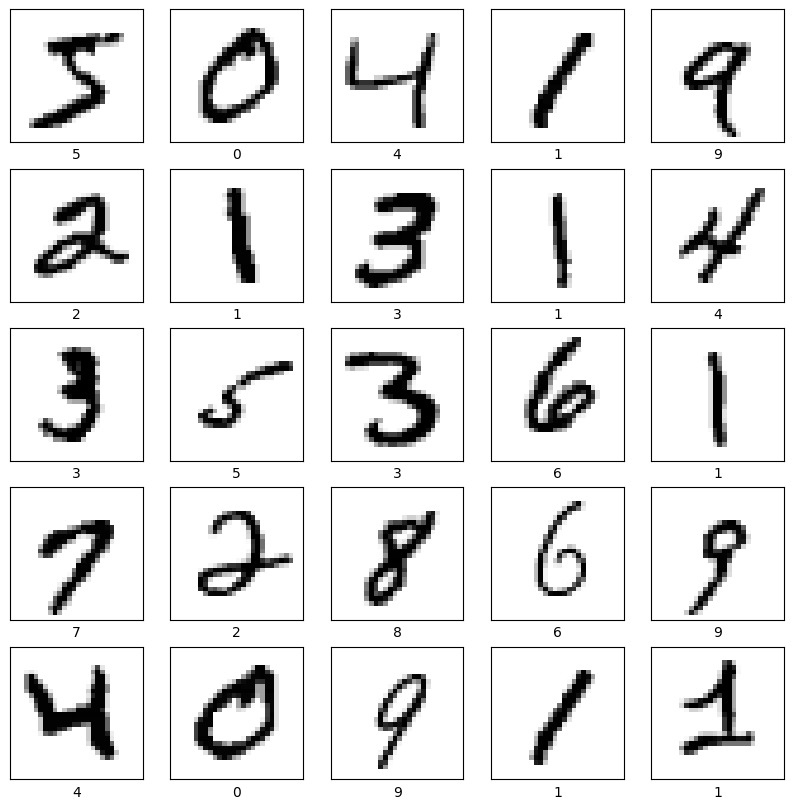

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

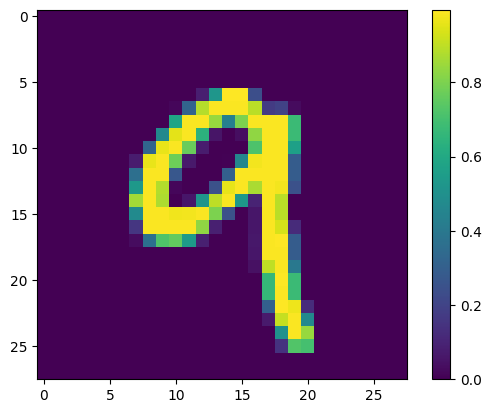

In [44]:
#picking the 110th image 
plt.imshow(X_train[110])
plt.colorbar()
plt.show()

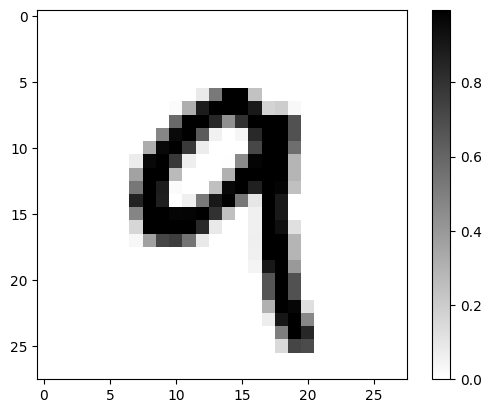

In [46]:
#picking the 110th image 
plt.imshow(X_train[110],cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [58]:
#convert pixel value into integer

for row in X_train[130]:
    for pixel in row:
        print("{:2}".format(int(pixel)), end=" ")  #why all are 0???? - pixels after normalization
    print()

 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [53]:
X_train[130]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<h1>Model building</h1>

In [59]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)        
    ])

C:\Users\Aniket kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
ann.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [70]:
model=ann.fit(X_train,y_train,epochs=5) #cannot fit before compilation

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1652 - loss: 2.3024
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1169 - loss: 2.3030
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1246 - loss: 2.3026
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1255 - loss: 2.3026
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1235 - loss: 2.3026


In [73]:
model.history.keys()

dict_keys(['accuracy', 'loss'])

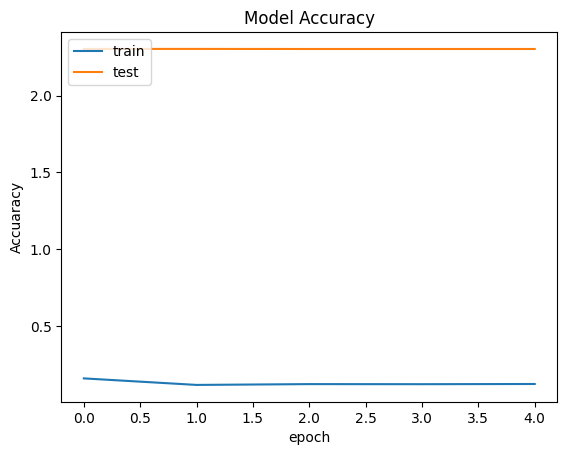

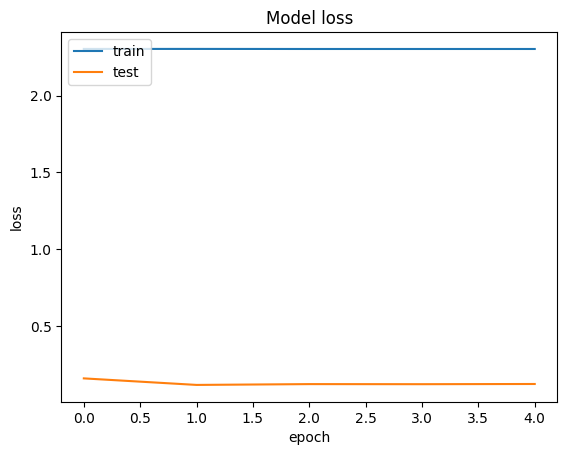

In [75]:
plt.plot(model.history["accuracy"])
plt.plot(model.history["loss"])
plt.title("Model Accuracy")
plt.ylabel("Accuaracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

plt.plot(model.history["loss"])
plt.plot(model.history["accuracy"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [76]:
##Failed model

In [ ]:
# second model

In [9]:
input_layer = tf.keras.layers.Input(shape=(28, 28,1))

In [10]:
model = tf.keras.models.Sequential([
    input_layer,
    # Convolutional layer with 32 filters and 3x3 kernel size, using ReLU activation
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer
    tf.keras.layers.MaxPooling2D(),
    # Convolutional layer with 32 filters and 3x3 kernel size, using ReLU activation
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer
    tf.keras.layers.MaxPooling2D(),
    # Convolutional layer with 32filters and 3x3 kernel size, using ReLU activation
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer
    tf.keras.layers.MaxPooling2D(),
    # Flatten layer to convert 2D data to 1D
    tf.keras.layers.Flatten(),
    # Output layer with 10 units (for 10 classes) and softmax activation
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,146 (74.79 KB)

 Trainable params: 19,146 (74.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
# fit the model
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.7921 - loss: 0.6333 - val_accuracy: 0.9569 - val_loss: 0.1406
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9643 - loss: 0.1142 - val_accuracy: 0.9712 - val_loss: 0.0998
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9750 - loss: 0.0830 - val_accuracy: 0.9754 - val_loss: 0.0826
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9800 - loss: 0.0653 - val_accuracy: 0.9812 - val_loss: 0.0652
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9844 - loss: 0.0511 - val_accuracy: 0.9820 - val_loss: 0.0623
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9856 - loss: 0.0440 - val_accuracy: 0.9793 - val_loss: 0.0743
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9875 - loss: 0.0401 - val_accuracy: 0.9824 - val_loss: 0.0580
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9886 -

In [20]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9806 - loss: 0.0682
Test accuracy: 0.9853000044822693
Test loss: 0.051698602735996246


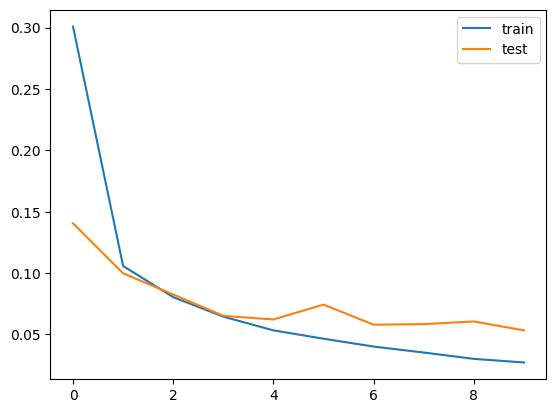

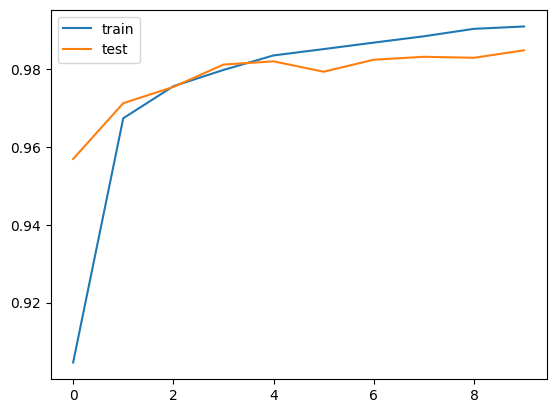

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)
# plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot the accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [24]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[9.63420277e-09, 2.51174624e-05, 2.58602063e-06, ...,
        9.99971747e-01, 4.10092828e-11, 3.48462912e-08],
       [7.61657429e-04, 1.78973729e-04, 9.98962402e-01, ...,
        6.19300664e-08, 9.40939426e-05, 1.17864950e-07],
       [9.29386374e-07, 9.99904752e-01, 1.56788192e-05, ...,
        1.46767688e-05, 4.63546758e-06, 4.31249987e-07],
       ...,
       [1.18187239e-13, 3.64581520e-13, 1.42511068e-12, ...,
        2.25241336e-11, 1.07007644e-07, 2.32332216e-08],
       [1.90343860e-06, 2.41942859e-13, 2.21775723e-11, ...,
        7.45818424e-12, 1.16582800e-04, 1.89078122e-08],
       [4.99355519e-06, 1.55033647e-12, 2.04680660e-07, ...,
        9.99581142e-14, 1.79750998e-06, 1.06596010e-09]], dtype=float32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


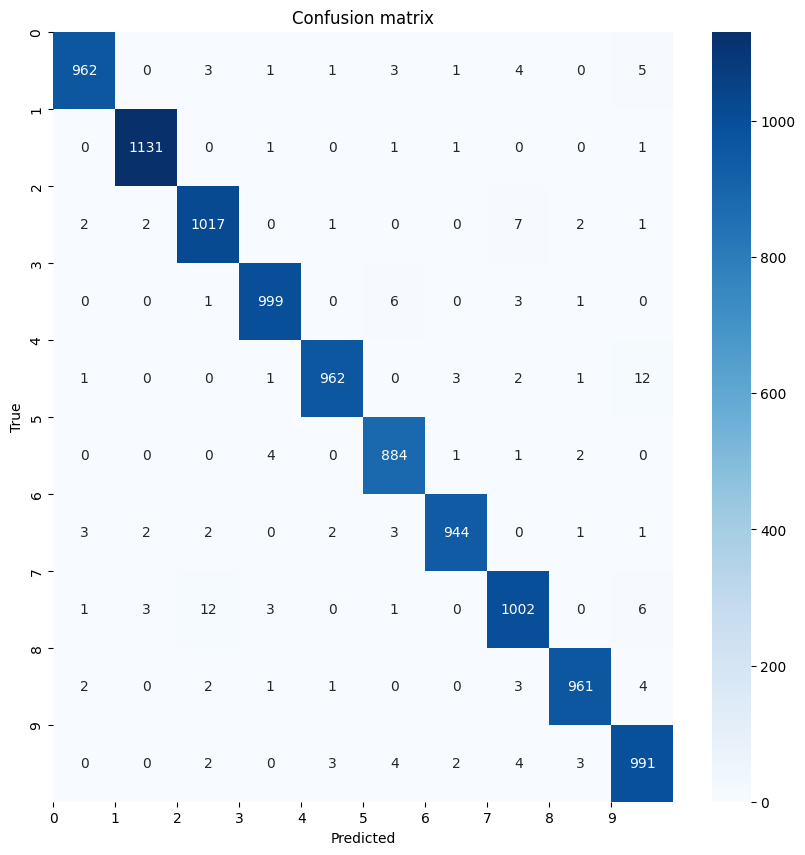

In [29]:
plt.figure(figsize=(10,10))
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.show()

In [ ]:
#testing only 

In [31]:
def load_and_preprocess_image(image_path):
    # Open the URL for reading
    with urllib.request.urlopen(image_path) as url:
        # Load the image
        image = np.array(Image.open(url))

In [35]:
import urllib.request

In [36]:
custom_image_path = 'https://i.stack.imgur.com/Ds5Rc.png'

# Load and preprocess the custom image
custom_image = load_and_preprocess_image(custom_image_path)

# Predict the class of the custom image
predicted_class, confidence = predict_custom_image(model, custom_image)

# Display the prediction
plt.imshow(custom_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")
plt.axis('off')
plt.show()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>